In [1]:
import pandas
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# CNCF Research User Group Attendance

Quick analysis of the list of attendees collected from the agenda page.

It takes into account the data of the last 10 meetings of the CNCF RUG.

In [2]:
df = pandas.read_csv('rug.csv')

## Unique Attendees

In [3]:
df_names = df.groupby('Name').count().sort_values(['Institution'], ascending=False)
df_names['Institution'].count()

65

## Unique Institutions

In [4]:
df_institutions = df.groupby('Institution').count().sort_values(['Name'], ascending=False)
df_institutions['Name'].count()

34

## Institution Overview

array([<AxesSubplot:>], dtype=object)

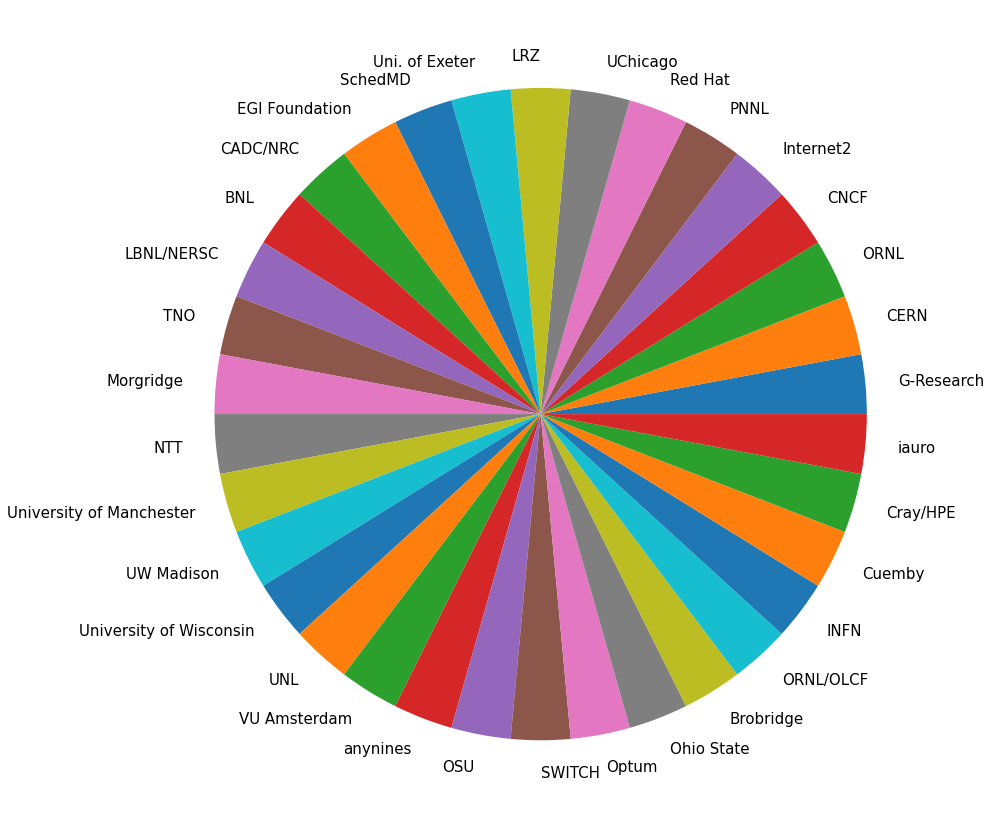

In [5]:
dfinst = df_institutions.copy()
dfinst['Name'] = 1 
dfinst.plot.pie(subplots=True, figsize=(15, 15), legend=False, fontsize=15, ylabel='')

## Institution Word Cloud

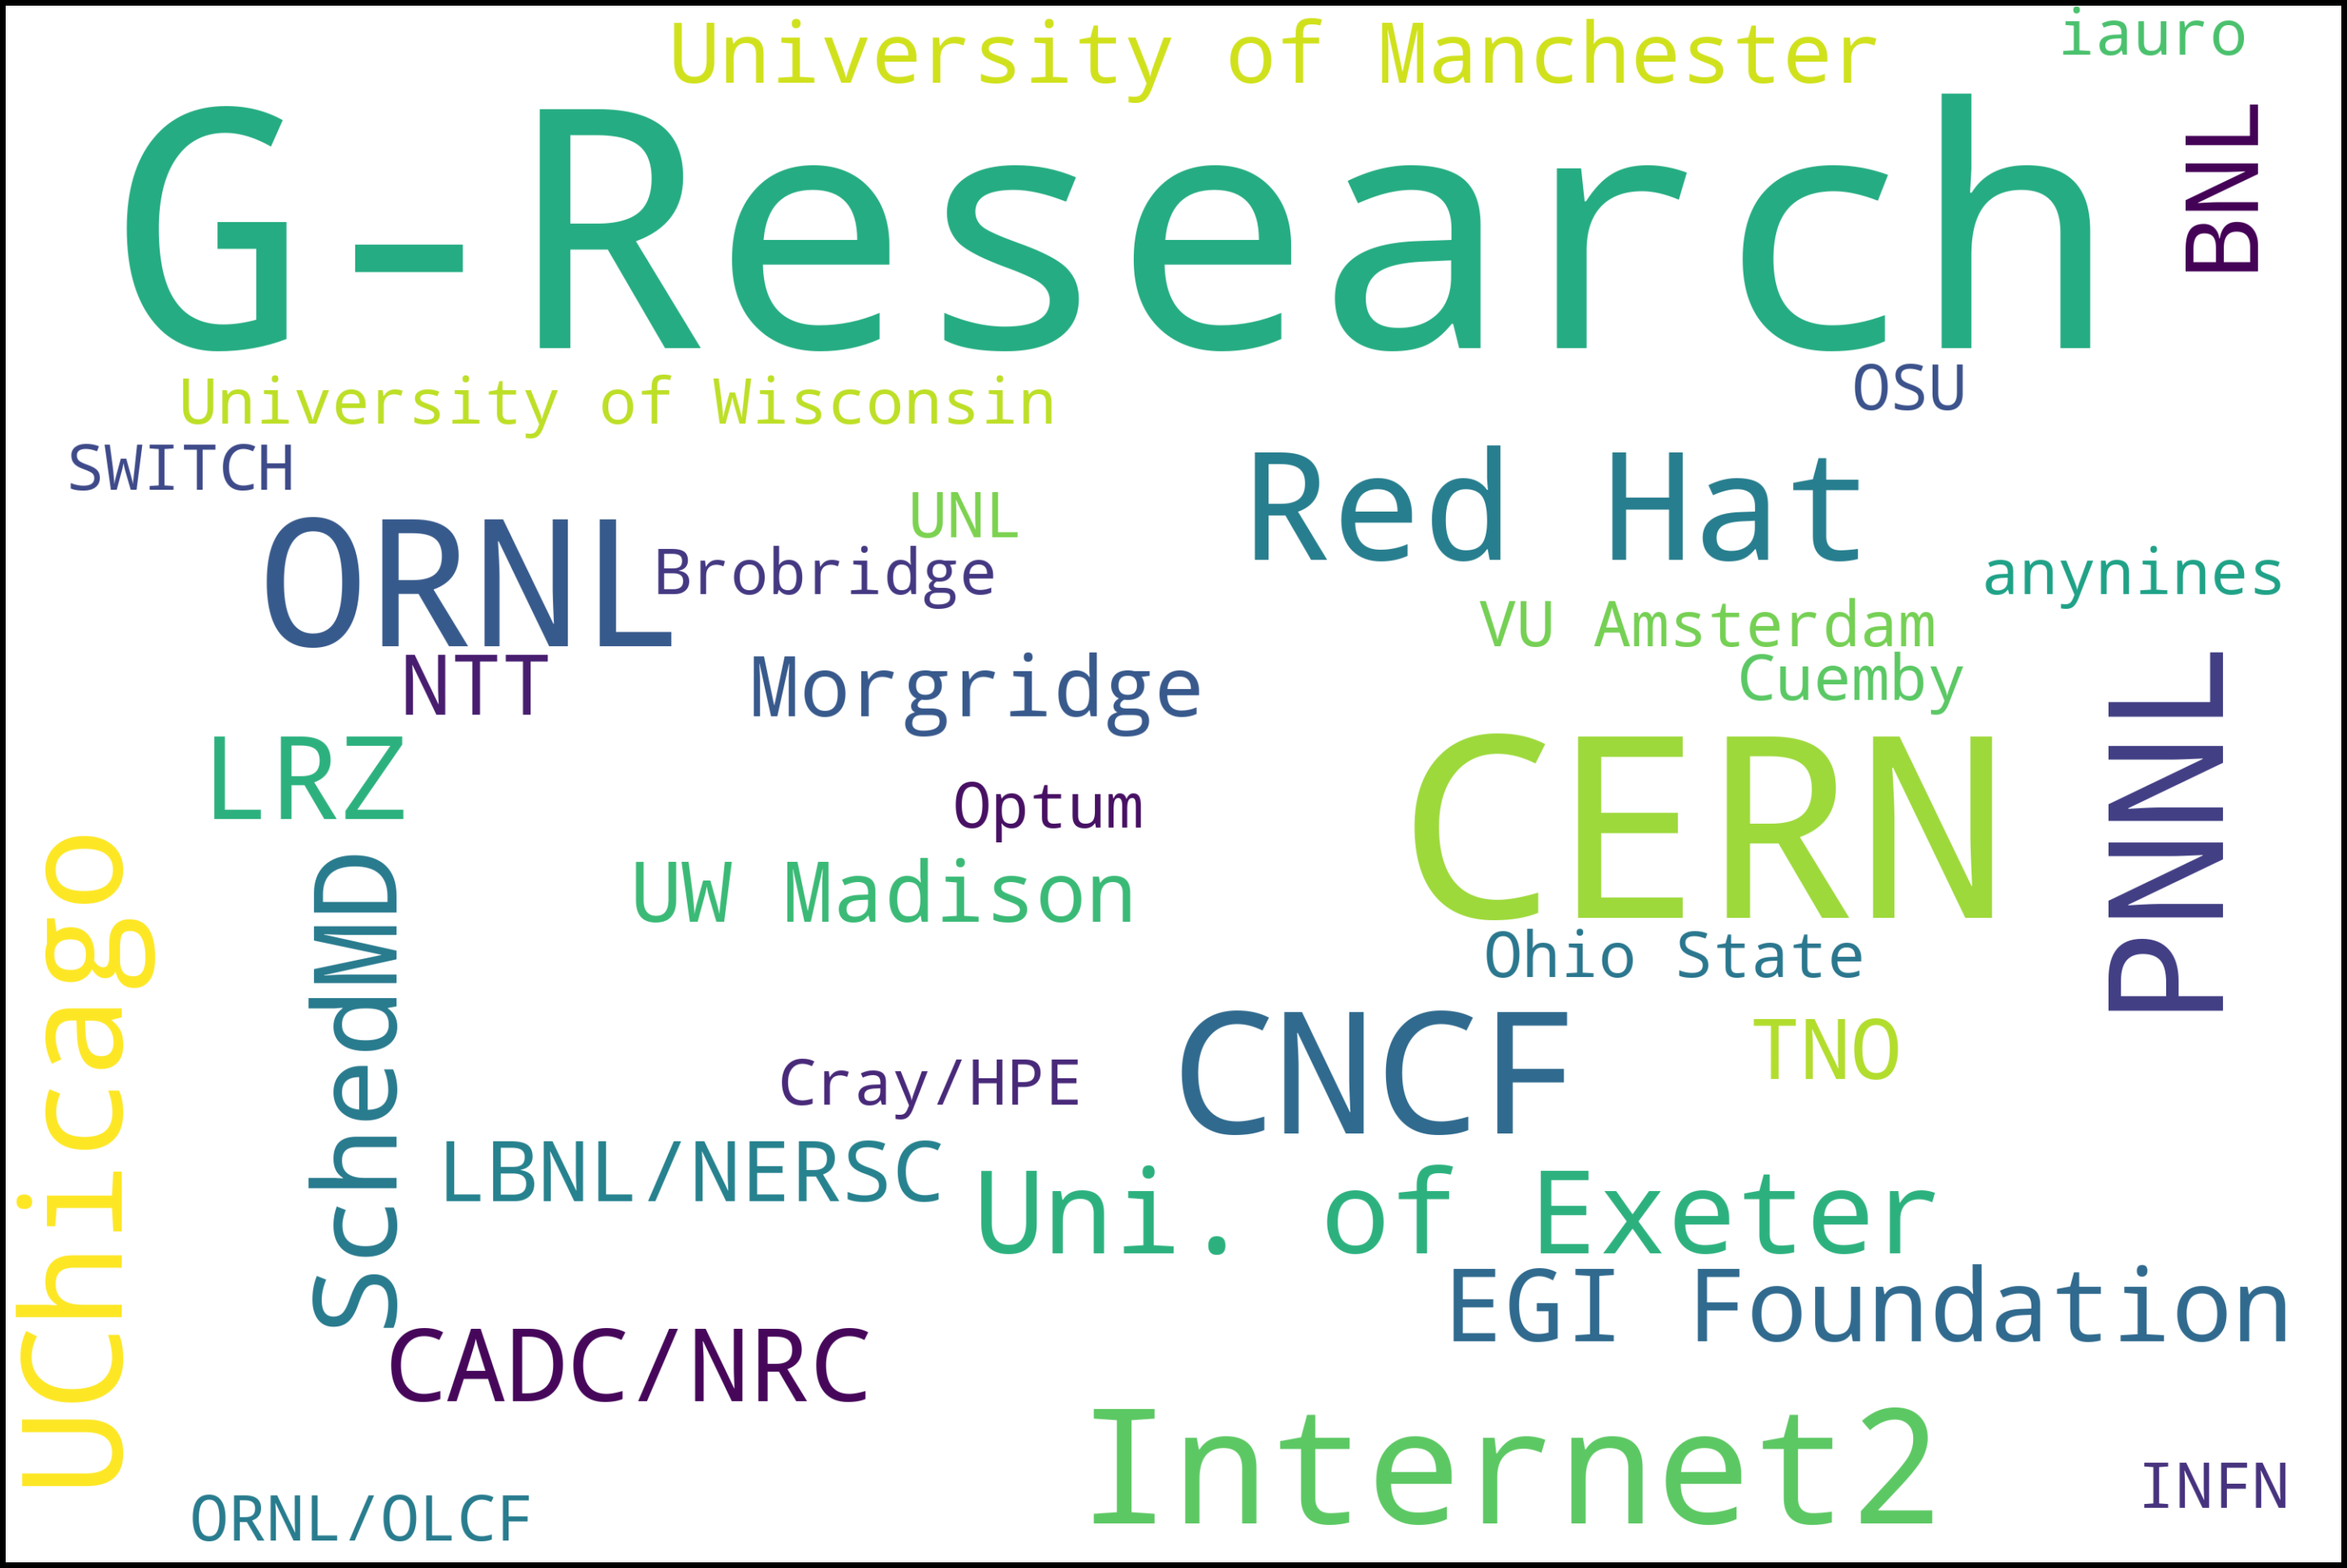

In [6]:
wc = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate_from_frequencies(df_institutions.to_dict()['Name'])

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()